Profanity Detection - Social Media( simplest approach) using TensorFlow

Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv
import re
import zipfile
import string
#!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Almost every social networking website's text data has the same content- uppercase and lowercase texts, numbers, punctuation, and special characters.


I'll create a basic nlp semantic classifier for twitter to detect profanity in tweets using a random dataset from twitter in this scenario.

In [3]:
# loading data- train and test containing tweet and labels- {0 :positive text ,1:negative text}
# For Semantic tasks - every text contains set of common words, which carry little useful imformation
# It is better to remove these words in classification tasks.

sentences = []
labels = []
fields = []
stopwords=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", 
           "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
           "who", "whom", "this", "that","these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
           "do", "does", "did",  "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
           "for", "with", "about","against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", 
           "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", 
           "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same",
           "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

with open("/content/train_tweet.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        sentence = row[2]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)
    

In [4]:
sentences[0]

' @user father dysfunctional selfish drags kids dysfunction. #run'

In [5]:
# returns a string where all characters are lower case.
# remove punctuation and emoji unicode(didn't want to code extra)

text=[i.lower().lstrip() for i in sentences]
text[:100]

data=[]
for i in text:
  a=''.join([char for char in i if char not in string.punctuation])
  data.append(re.sub(r'[^\x00-\x7f]',r'', a).replace("  ",''))

In [6]:
print(data[:20])
print(len(data))

['user father dysfunctional selfish drags kids dysfunction run', 'user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked', 'bihday majesty', 'model love u take u time ur', 'factsguide society motivation', '22 huge fan fare big talking leave chaos pay disputes get there allshowandnogo ', 'user camping tomorrow user user user user user user user danny', 'the next school year year exams cant thinkschool exams hate imagine actorslife revolutionschool girl', 'we won love land allin cavs champions cleveland clevelandcavaliers', 'user user welcomeim its gr8', ' ireland consumer price index mom climbed previous 02 05 may blog silver gold forex', 'we selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love ', 'i get see daddy today 80days gettingfed', 'user cnn calls michigan middle school build wall chanttcot ', 'no comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins

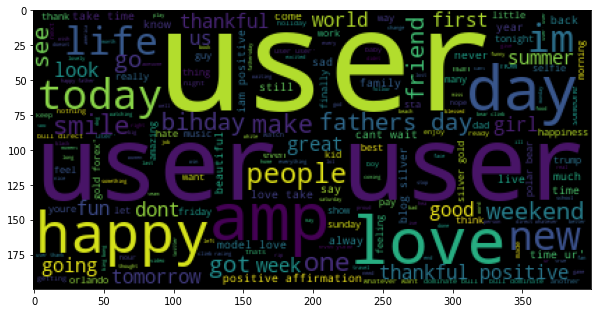

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(str(data)))

There is a lot of immbalance in the data with positive and negative tweets.This will affect our models 

In [8]:
print(len(data))
print(len(labels))

31962
31962


In [9]:
# dividing data into train and test 
train_data=data[:30000]
train_label=labels[:30000]
test_data=data[30000:]
test_label=labels[30000:]

print(len(train_data))
print(len(test_data))
print(len(train_label))
print(len(test_label))

30000
1962
30000
1962


In [16]:
# using tensorflow tokenizer, we are assigning a unique number to each text
# word index give a dictionary of words and their unique numbers
token=Tokenizer(num_words=10000,oov_token='oov')
token.fit_on_texts(train_data)
word_index=token.word_index


In [17]:
len(word_index)

43897

In [20]:
sentence=token.texts_to_sequences(train_data) # each sentence is replaced by its tokens or unique numbers
train_padding=pad_sequences(sentence,maxlen=20,padding='post') # the length of each sentence should be same. So, sentence are padded according to largest sentence

test_sentence=token.texts_to_sequences(test_data) # same for test data but we will use word index generated from train data. All unknown data will be marked as oov.
test_padding=pad_sequences(test_sentence,maxlen=20,padding='post') 
print("Train data:")
print(train_data[0])
print(sentence[0])
print(train_padding[0])

print('Test Data:')
print(test_data[1])
print(test_sentence[1])
print(test_padding[1])

Train data:
user father dysfunctional selfish drags kids dysfunction run
[2, 190, 1, 2952, 7058, 200, 7059, 390]
[   2  190    1 2952 7058  200 7059  390    0    0    0    0    0    0
    0    0    0    0    0    0]
Test Data:
nothing feels better nice clean bed good night clean sleepy goodnight
[186, 750, 194, 197, 1163, 436, 20, 93, 1163, 3180, 1454]
[ 186  750  194  197 1163  436   20   93 1163 3180 1454    0    0    0
    0    0    0    0    0    0]


In [21]:
# converting into array with dtype int64 for model.
train_set=np.array(train_padding).astype('int64')
train_label=np.array(train_label).astype('int64')
test_set=np.array(test_padding).astype('int64')
test_label=np.array(test_label).astype('int64')

print(train_padding.shape)
print(test_padding.shape)
print(len(train_label))
print(len(test_label))

(30000, 20)
(1962, 20)
30000
1962


Each sentece is converted into its respective tokens and each token is padded according to largest sentence.

In [22]:
# Preparing model and summary showing shape of each layers.

model=tf.keras.Sequential([tf.keras.layers.Embedding(10000,16,input_length=20),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                           tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 64)           12544     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 199,809
Trainable params: 199,809
Non-tr

In [23]:
#model is evaluated for 5 epochs tested on validation data.
history=model.fit(train_padding,train_label, epochs=5,validation_data=(test_padding,test_label))


Epoch 1/5
938/938 [==============================] - 17s 13ms/step - loss: 0.1609 - accuracy: 0.9493 - val_loss: 0.1250 - val_accuracy: 0.9562
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0798 - accuracy: 0.9727 - val_loss: 0.1232 - val_accuracy: 0.9582
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0565 - accuracy: 0.9808 - val_loss: 0.1317 - val_accuracy: 0.9597
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0440 - accuracy: 0.9857 - val_loss: 0.1525 - val_accuracy: 0.9582
Epoch 5/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.1577 - val_accuracy: 0.9628


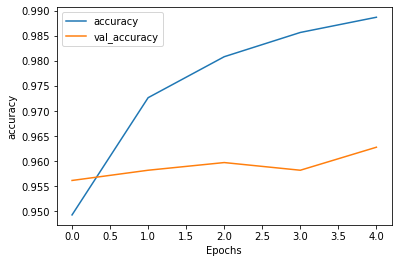

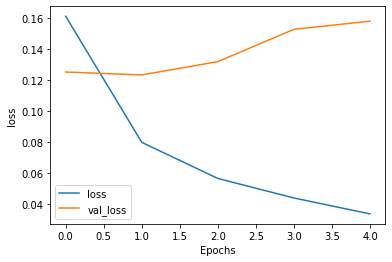

In [26]:
# plot shows change in values of loss and accuracy in each epoch.
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
